In [3]:
import pandas as pd

#buat dataframe read data
df = pd.read_csv('../data/socr.csv', sep=',')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


## konversi data menjadi satuan cm dan kg

In [6]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={
        "Height(Inches)": "tinggi_cm",
        "Weight(Pounds)": "berat_kg"
    })
    .assign(
        tinggi_cm = lambda d: d["tinggi_cm"] * 2.54,       # in → cm
        berat_kg  = lambda d: d["berat_kg"] * 0.45359237   # lb → kg
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
    .copy()
)

df1.head()


,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


## split data training 80% dan data testing 20%

In [7]:
from sklearn.model_selection import train_test_split

# variabel independent/bebas
X = df1[['tinggi_cm']]
# variabel depedent/terikat
y = df1[['berat_kg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
# cetak data training X
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


## Pemodelan Data:dengan data training

In [9]:
from sklearn.linear_model import LinearRegression   

# buat objek model dari class LinearRegression
model = LinearRegression()  

# Lakukan proses training
model.fit(X_train, y_train)


LinearRegression()

In [10]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Prediksi model dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Membuat DataFrame untuk ringkasan hasil
df_resume = pd.DataFrame()
df_resume['R2'] = [r2]
df_resume['Koefisien (Kg/cm)'] = [model.coef_[0]]
df_resume['Intersep (Kg)'] = [model.intercept_]
df_resume['MAE (Kg)'] = [mean_absolute_error(y_test, y_pred)]

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Jika ingin menambahkan RMSE ke DataFrame
df_resume['RMSE (Kg)'] = [rmse]

# Menampilkan ringkasan hasil
df_resume


,R2,Koefisien (Kg/cm),Intersep (Kg),MAE (Kg),RMSE (Kg)
0,0.249893,[0.5518232618278288],[-37.657088783833615],3.670411,4.609006


## cetak persamaan regresi

In [12]:
slope = model.coef_[0].item()   # ubah array jadi float
intercept = model.intercept_.item() if hasattr(model.intercept_, "item") else model.intercept_

print(f"persamaan : y = {slope:.3f}*x + {intercept:.3f}")

persamaan : y = 0.552*x + -37.657


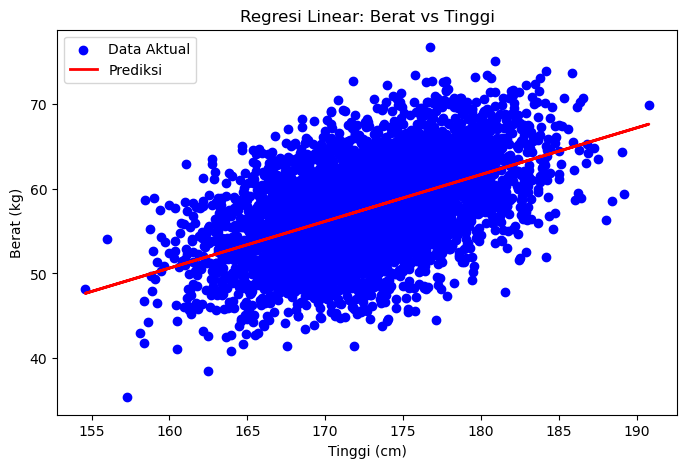

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.legend()
plt.show()

## data testing dari mahasiswa ti 2022

In [22]:
data = pd.read_csv('../data/data_ti2022.csv', sep=';')

y_pred = model.predict(data[['tinggi_cm']])
data['prediksi_kg'] = y_pred
data['Selisih error (kg)'] = data['prediksi_kg'] - data['actual_berat_kg']
denom = data['actual_berat_kg'].replace(0, np.nan)
data['Akurasi (%)'] = (1 - (data['Selisih error (kg)'].abs() / denom)).clip(lower=0, upper=1) * 100
data

,No,Nama,tinggi_cm,actual_berat_kg,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,rafa,168,58.5,55.049219,-3.450781,94.101229
1,2,tiara,162,78.2,51.738280,-26.461720,66.161483
2,3,tiya,155,52.7,47.875517,-4.824483,90.845383
3,4,keyla,160,70.3,50.634633,-19.665367,72.026505
4,5,bani,183,65.8,63.326568,-2.473432,96.240985


In [17]:
# ambil X_testing
X_testing = df_ti2022['tinggi_cm']
X_testing

0    168
1    162
2    155
3    160
4    183
Name: tinggi_cm, dtype: int64

In [23]:
data.describe()

,No,tinggi_cm,actual_berat_kg,prediksi_kg,Selisih error (kg),Akurasi (%)
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,165.600000,65.100000,53.724843,-11.375157,83.875117
std,1.581139,10.784248,9.955652,5.950999,10.969045,13.786181
min,1.000000,155.000000,52.700000,47.875517,-26.461720,66.161483
25%,2.000000,160.000000,58.500000,50.634633,-19.665367,72.026505
50%,3.000000,162.000000,65.800000,51.738280,-4.824483,90.845383
75%,4.000000,168.000000,70.300000,55.049219,-3.450781,94.101229
max,5.000000,183.000000,78.200000,63.326568,-2.473432,96.240985
